<a href="https://colab.research.google.com/github/onurozansunger/FDS-PROJECT/blob/main/merged2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

In [ ]:
netflix_data = pd.read_csv('netflix_titles.csv', delimiter=',', encoding='utf-8')
name_data = pd.read_csv('name_basics.tsv', delimiter='\t', encoding='utf-8')


In [ ]:
title_data = pd.read_csv('title_basics.tsv', delimiter='\t', encoding='utf-8')
ratings_data = pd.read_csv('ratings_data.tsv', delimiter='\t', encoding='utf-8')

/tmp/ipykernel_32067/1993750163.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  title_data = pd.read_csv('title_basics.tsv', delimiter='\t', encoding='utf-8')


In [ ]:
title_data.head(5)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [ ]:
merged_df = pd.merge(title_data, ratings_data, on='tconst', how='inner')

In [ ]:
merged_df['runtimeMinutes'] = pd.to_numeric(merged_df['runtimeMinutes'], errors='coerce')

# Remove rows where 'column_name' is NaN after conversion
merged_df = merged_df[merged_df['runtimeMinutes'].notna()]

# Reset index if needed
merged_df.reset_index(drop=True, inplace=True)

/tmp/ipykernel_32067/3011450976.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['runtimeMinutes'] = pd.to_numeric(merged_df['runtimeMinutes'], errors='coerce')


In [ ]:
merged_df.info

<bound method DataFrame.info of            tconst  titleType                    primaryTitle  \
0       tt0000001      short                      Carmencita   
1       tt0000002      short          Le clown et ses chiens   
2       tt0000003      short                  Pauvre Pierrot   
3       tt0000004      short                     Un bon bock   
4       tt0000005      short                Blacksmith Scene   
...           ...        ...                             ...   
980838  tt9916690  tvEpisode  Horrid Henry Delivers the Milk   
980839  tt9916730      movie                          6 Gunn   
980840  tt9916766  tvEpisode                  Episode #10.15   
980841  tt9916840  tvEpisode      Horrid Henry's Comic Caper   
980842  tt9916880  tvEpisode       Horrid Henry Knows It All   

                         originalTitle isAdult startYear endYear  \
0                           Carmencita       0      1894      \N   
1               Le clown et ses chiens       0      1892      \

In [ ]:
#runtimeMinutes'in coefficient'ı çok düşük (0.5'ten düşük) olduğu için onu seçmemeliyiz sonucu çıktı
correlation = merged_df['averageRating'].corr(merged_df['runtimeMinutes'])
print("Correlation coefficient:", correlation) #kullanmamalıyız kanıtı

Correlation coefficient: -0.08317765978195327


In [ ]:
#numVotes'un coefficient'ı çok düşük (0.5'ten düşük) olduğu için onu seçmemeliyiz sonucu çıktı
correlation = merged_df['averageRating'].corr(merged_df['numVotes'])
print("Correlation coefficient:", correlation)

Correlation coefficient: 0.016895536785043776


In [ ]:
from scipy.stats import ttest_ind


In [ ]:
#isadult kısmını kullanmamız gerekiyor sonucu çıktı, kodu düzenlemeyecekse burayı yazmamalıyız

group1 = merged_df[merged_df['isAdult'] == 0]['averageRating']
group2 = merged_df[merged_df['isAdult'] == 1]['averageRating']

t_stat, p_value = ttest_ind(group1, group2, equal_var=False)  # Assuming unequal variances
print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: 67.14316168686301
P-value: 0.0


In [ ]:
dataset1.head(5)

,tconst,averageRating,numVotes
0,tt0000001,5.7,2009
1,tt0000002,5.7,270
2,tt0000003,6.5,1929
3,tt0000004,5.4,178
4,tt0000005,6.2,2702


In [ ]:
from scipy.stats import f_oneway

In [ ]:
merged_df.head(5)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1.0,"Documentary,Short",5.7,2011
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5.0,"Animation,Short",5.7,271
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4.0,"Animation,Comedy,Romance",6.5,1931
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12.0,"Animation,Short",5.4,179
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1.0,"Comedy,Short",6.2,2702


In [ ]:
netflix_data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
netflix_merged_df = pd.merge(netflix_data, merged_df, left_on='title', right_on= 'primaryTitle', how='left')

In [ ]:
netflix_merged_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,movie,Dick Johnson Is Dead,Dick Johnson Is Dead,0,2020,\N,89.0,"Biography,Documentary,Drama",7.4,7125.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,tvEpisode,Blood & Water,Blood & Water,0,2014,\N,42.0,"Crime,Documentary",8.0,22.0
2,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,tvEpisode,Blood & Water,Blood & Water,0,2014,\N,88.0,"Crime,Drama,Mystery",7.3,528.0
3,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,tvEpisode,Blood & Water,Blood & Water,0,2018,\N,44.0,"Adventure,Documentary,Reality-TV",7.1,14.0
4,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,tvSeries,Blood & Water,Blood & Water,0,2020,\N,53.0,"Drama,Mystery",6.7,3958.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25690,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,...,movie,Zoom,Zoom,0,2015,\N,96.0,"Animation,Comedy,Drama",6.1,2980.0
25691,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,...,short,Zoom,Zoom,0,2007,\N,3.0,Short,6.1,14.0
25692,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,...,movie,Zoom,Zoom,0,2016,\N,158.0,"Comedy,Drama,Romance",5.6,128.0
25693,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,...,movie,Zubaan,Zubaan,0,2015,\N,115.0,Drama,6.1,523.0


In [ ]:
f_stat, p_value = f_oneway(*[netflix_merged_df[netflix_merged_df['country'] == country]['averageRating'] for country in netflix_merged_df['country'].unique()])

print("F-statistic:", f_stat)
print("p-value:", p_value)

F-statistic: nan
p-value: nan


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


In [ ]:
from scipy.stats import f_oneway

# Assuming netflix_merged_df is your DataFrame with 'country' and 'averageRating' columns

# Count the number of movies per country
country_counts = netflix_merged_df['country'].value_counts()

# Filter out countries with insufficient data points (e.g., less than a threshold)
threshold = 1000  # Adjust this threshold as needed
valid_countries = country_counts[country_counts >= threshold].index.tolist()

# Print the valid countries and their counts
print("Valid Countries and Their Counts:")
print(country_counts[country_counts >= threshold])

# Perform ANOVA test for 'country' and 'averageRating' only for valid countries
filtered_data = [netflix_merged_df[netflix_merged_df['country'] == country]['averageRating'] for country in valid_countries]
f_stat, p_value = f_oneway(*filtered_data)

print("F-statistic:", f_stat)
print("p-value:", p_value)


Valid Countries and Their Counts:
country
United States     8459
India             2432
United Kingdom    1307
Name: count, dtype: int64
F-statistic: nan
p-value: nan


In [3]:

netflix4 = pd.read_csv('netflix4.csv')

In [4]:
netflix4.head(5)

,show_id,type,title,country,release_year,rating,averageRating,numVotes,genres,directors,category,primaryName
0,s1,Movie,Dick Johnson Is Dead,United States,2020,PG-13,7.4,7119.0,"Biography,Documentary,Drama",nm0990310,actor,Michael Hilow
1,s1,Movie,Dick Johnson Is Dead,United States,2020,PG-13,7.4,7119.0,"Biography,Documentary,Drama",nm0990310,actress,Ana Hoffman
2,s2,TV Show,Blood & Water,South Africa,2021,TV-MA,8.0,22.0,"Crime,Documentary",nm1520612,actress,Susan Sarandon
3,s2,TV Show,Blood & Water,South Africa,2021,TV-MA,7.3,528.0,"Crime,Drama,Mystery",nm0809375,director,Mike Smith
4,s2,TV Show,Blood & Water,South Africa,2021,TV-MA,7.3,528.0,"Crime,Drama,Mystery",nm0809375,actor,Neill Rea


In [ ]:
f_stat, p_value = f_oneway(*[netflix4[netflix4['country'] == country]['averageRating'] for country in netflix4['country'].unique()])


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


In [ ]:
from scipy.stats import f_oneway

# Assuming netflix_merged_df is your DataFrame with 'country' and 'averageRating' columns

# Count the number of movies per country
country_counts = netflix4['country'].value_counts()

# Filter out countries with insufficient data points (e.g., less than a threshold)
threshold = 5  # Adjust this threshold as needed
valid_countries = country_counts[country_counts >= threshold].index.tolist()

# Print the valid countries and their counts
print("Valid Countries and Their Counts:")
print(country_counts[country_counts >= threshold])

# Perform ANOVA test for 'country' and 'averageRating' only for valid countries
filtered_data = [netflix4[netflix4['country'] == country]['averageRating'] for country in valid_countries]
f_stat, p_value = f_oneway(*filtered_data)

print("F-statistic:", f_stat)
print("p-value:", p_value)
#country kullanılmalı sonucu çıkmış oldu

Valid Countries and Their Counts:
country
United States                                                     44722
India                                                             13153
United Kingdom                                                     6719
South Korea                                                        4215
Canada                                                             2506
                                                                  ...  
United States, India, Bangladesh                                      5
Chile, Argentina                                                      5
Indonesia, South Korea, Singapore                                     5
Canada, Luxembourg                                                    5
Brazil, Netherlands, United States, Colombia, Austria, Germany        5
Name: count, Length: 608, dtype: int64
F-statistic: 6.838726434406598
p-value: 0.0


In [ ]:
from scipy.stats import f_oneway

# Assuming netflix_merged_df is your DataFrame with 'country' and 'averageRating' columns

# Count the number of movies per country
names_counts = netflix4['primaryName'].value_counts()

# Filter out countries with insufficient data points (e.g., less than a threshold)
threshold = 5  # Adjust this threshold as needed
valid_names = names_counts[names_counts >= threshold].index.tolist()

# Print the valid countries and their counts
print("Valid Names and Their Counts:")
print(names_counts[names_counts >= threshold])

# Perform ANOVA test for 'country' and 'averageRating' only for valid countries
filtered_data2 = [netflix4[netflix4['primaryName'] == name]['averageRating'] for name in valid_names]
f_stat2, p_value2 = f_oneway(*filtered_data2)

print("F-statistic:", f_stat2)
print("p-value:", p_value2)
#isim kullanılmalı sonucu çıkmış oldu

Valid Names and Their Counts:
primaryName
Doug Walker        101
Malcolm Ray         47
Jon Bailey          46
Tamara Chambers     45
Tara Strong         43
                  ... 
Fele Martínez        5
Mikey Day            5
Eiza González        5
Sherman Hemsley      5
Rod Steiger          5
Name: count, Length: 4468, dtype: int64
F-statistic: 4.091473904770355
p-value: 0.0


In [3]:
netflix = pd.read_csv('/content/netflix41.csv')

In [4]:
netflix.drop([ 'directors', 'title', 'rating', 'show_id', 'release_year'], axis=1, inplace=True)

In [5]:
netflix4 = netflix.dropna()

In [6]:
netflix4.head()

,type,country,averageRating,numVotes,genres,category,primaryName
0,Movie,United States,7.4,7119.0,"Biography,Documentary,Drama",actor,Michael Hilow
1,Movie,United States,7.4,7119.0,"Biography,Documentary,Drama",actress,Ana Hoffman
2,TV Show,South Africa,8.0,22.0,"Crime,Documentary",actress,Susan Sarandon
3,TV Show,South Africa,7.3,528.0,"Crime,Drama,Mystery",director,Mike Smith
4,TV Show,South Africa,7.3,528.0,"Crime,Drama,Mystery",actor,Neill Rea


In [7]:
netflix5=netflix4[netflix4['category']=='director']

In [8]:
netflix5.head()

,type,country,averageRating,numVotes,genres,category,primaryName
3,TV Show,South Africa,7.3,528.0,"Crime,Drama,Mystery",director,Mike Smith
7,TV Show,South Africa,8.0,22.0,"Crime,Documentary",director,Steve Rivo
71,Movie,"United States,Ghana,Burkina Faso,United Kingdo...",7.0,784.0,Drama,director,Haile Gerima
84,Movie,"United States,Ghana,Burkina Faso,United Kingdo...",8.4,7.0,"Documentary,Short",director,Princess Garrett
88,Movie,United States,6.4,14869.0,"Comedy,Drama",director,Theodore Melfi


In [9]:
netflix5.columns

Index(['type', 'country', 'averageRating', 'numVotes', 'genres', 'category',
       'primaryName'],
      dtype='object')

In [10]:
warnings.filterwarnings('ignore')

# 'genres', 'country', 'primaryName' sütunlarını liste haline getirme ve 'type' sütununu binary'e dönüştürme
netflix5['genres'] = netflix5['genres'].apply(lambda x: x.split(',') if isinstance(x, str) else [])
netflix5['primaryName'] = netflix5['primaryName'].apply(lambda x: x.split(',') if isinstance(x, str) else [])
netflix5['country'] = netflix5['country'].apply(lambda x: x.split(',') if isinstance(x, str) else [])
netflix5['type'] = netflix5['type'].apply(lambda x: 1 if x == 'Movie' else 0)

# 'rating', 'genres', 'country', 'primaryName' için benzersiz değerleri elde etme ve one-hot encoding uygulama
all_genres = sum(netflix5['genres'], [])
unique_genres = set(all_genres)
for genre in unique_genres:
    netflix5['Genre_' + genre] = netflix5['genres'].apply(lambda x: 1 if genre in x else 0)

all_names = sum(netflix5['primaryName'], [])
unique_names = set(all_names)
for name in unique_names:
    netflix5['Name_' + name] = netflix5['primaryName'].apply(lambda x: 1 if name in x else 0)

# 'country' için benzersiz değerleri elde etme ve one-hot encoding uygulama
all_countries = sum(netflix5['country'], [])
unique_countries = set(all_countries)
for country in unique_countries:
    netflix5['Country_' + country] = netflix5['country'].apply(lambda x: 1 if country in x else 0)

# Orijinal kategorik sütunları kaldırma
netflix5.drop(['genres', 'primaryName', 'country'], axis=1, inplace=True)

# Yeni DataFrame'in ilk beş satırını gösterme
print(netflix5.head())


    type  averageRating  numVotes  category  Genre_Crime  Genre_Adventure  \
3      0            7.3     528.0  director            1                0   
7      0            8.0      22.0  director            1                0   
71     1            7.0     784.0  director            0                0   
84     1            8.4       7.0  director            0                0   
88     1            6.4   14869.0  director            0                0   

    Genre_Musical  Genre_Film-Noir  Genre_Western  Genre_Comedy  ...  \
3               0                0              0             0  ...   
7               0                0              0             0  ...   
71              0                0              0             0  ...   
84              0                0              0             0  ...   
88              0                0              0             1  ...   

    Country_United Arab Emirates  Country_Afghanistan  Country_Angola  \
3                              

In [11]:
country_columns = [col for col in netflix5.columns if col.startswith('Country_')]
print(country_columns)


['Country_', 'Country_Mexico', 'Country_Vietnam', 'Country_Burkina Faso', 'Country_Israel', 'Country_Greece', 'Country_Zimbabwe', 'Country_India', 'Country_Hong Kong', 'Country_Lebanon', 'Country_Jamaica', 'Country_Botswana', 'Country_France', 'Country_Brazil', 'Country_Ireland', 'Country_West Germany', 'Country_Venezuela', 'Country_Poland', 'Country_Iran', 'Country_Ecuador', 'Country_Ukraine', 'Country_Austria', 'Country_Australia', 'Country_Philippines', 'Country_Malta', 'Country_Malaysia', 'Country_Bulgaria', 'Country_Canada', 'Country_Peru', 'Country_Qatar', 'Country_Paraguay', 'Country_Namibia', 'Country_Taiwan', 'Country_Russia', 'Country_Latvia', 'Country_Azerbaijan', 'Country_Japan', 'Country_Colombia', 'Country_Armenia', 'Country_Egypt', 'Country_China', 'Country_Kenya', 'Country_Spain', 'Country_Algeria', 'Country_Hungary', 'Country_Denmark', 'Country_Nigeria', 'Country_Nepal', 'Country_Panama', 'Country_Iceland', 'Country_Bahamas', 'Country_Thailand', 'Country_Saudi Arabia',

In [12]:
num_country_columns = sum(col.startswith('Country_') for col in netflix5.columns)
print("Toplam Country sütunu sayısı:", num_country_columns)


Toplam Country sütunu sayısı: 116


In [13]:
netflix5.drop(['category', 'Country_'], axis=1, inplace=True)

In [14]:
netflix5.head()

,type,averageRating,numVotes,Genre_Crime,Genre_Adventure,Genre_Musical,Genre_Film-Noir,Genre_Western,Genre_Comedy,Genre_\N,...,Country_United Arab Emirates,Country_Afghanistan,Country_Angola,Country_Chile,Country_Uganda,Country_Senegal,Country_Netherlands,Country_Lithuania,Country_Romania,Country_Czech Republic
3,0,7.3,528.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,8.0,22.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71,1,7.0,784.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
84,1,8.4,7.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88,1,6.4,14869.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
numvotes_df=netflix5["numVotes"]

<Axes: xlabel='numVotes'>

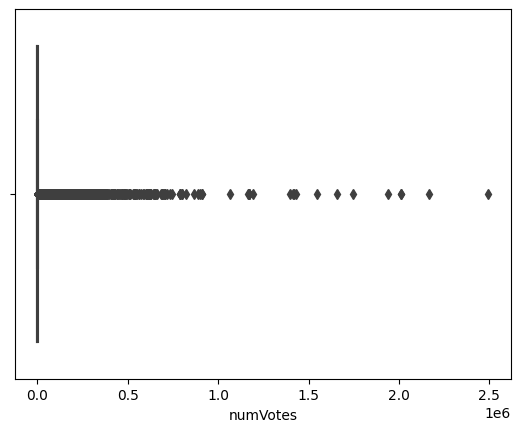

In [16]:
sns.boxplot(x=numvotes_df)

In [17]:
y_rating = netflix5['numVotes']

# IQR hesaplama
Q1 = y_rating.quantile(0.25)
Q3 = y_rating.quantile(0.75)
IQR = Q3 - Q1

# Aykırı değerleri filtreleme
not_outlier = (y_rating >= (Q1 - 1.5 * IQR)) & (y_rating <= (Q3 + 1.5 * IQR))

# Aykırı değerleri atılmış yeni bir DataFrame oluşturma
netflix5_clean = netflix5[not_outlier]

In [18]:
numvotes_df=netflix5_clean["numVotes"]

<Axes: xlabel='numVotes'>

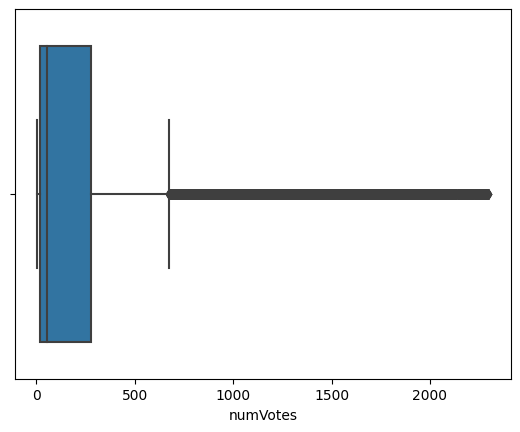

In [19]:
sns.boxplot(x=numvotes_df)

In [20]:
netflix5_clean.drop(['numVotes'], axis=1, inplace=True)

In [21]:
netflix5_clean.head()

,type,averageRating,Genre_Crime,Genre_Adventure,Genre_Musical,Genre_Film-Noir,Genre_Western,Genre_Comedy,Genre_\N,Genre_Game-Show,...,Country_United Arab Emirates,Country_Afghanistan,Country_Angola,Country_Chile,Country_Uganda,Country_Senegal,Country_Netherlands,Country_Lithuania,Country_Romania,Country_Czech Republic
3,0,7.3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,8.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71,1,7.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
84,1,8.4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100,1,5.5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [22]:
y_rating = netflix5_clean['averageRating']

# IQR hesaplama
Q1 = y_rating.quantile(0.25)
Q3 = y_rating.quantile(0.75)
IQR = Q3 - Q1
# Aykırı değerleri filtreleme
not_outlier = (y_rating >= (Q1 - 1.5 * IQR)) & (y_rating <= (Q3 + 1.5 * IQR))

# Aykırı değerleri atılmış yeni bir DataFrame oluşturma
netflix6_clean = netflix5_clean[not_outlier]

In [23]:
netflix6_clean.head()

,type,averageRating,Genre_Crime,Genre_Adventure,Genre_Musical,Genre_Film-Noir,Genre_Western,Genre_Comedy,Genre_\N,Genre_Game-Show,...,Country_United Arab Emirates,Country_Afghanistan,Country_Angola,Country_Chile,Country_Uganda,Country_Senegal,Country_Netherlands,Country_Lithuania,Country_Romania,Country_Czech Republic
3,0,7.3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,8.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71,1,7.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
84,1,8.4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100,1,5.5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [24]:
netflix6_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18390 entries, 3 to 137970
Columns: 15616 entries, type to Country_Czech Republic
dtypes: float64(1), int64(15615)
memory usage: 2.1 GB


In [25]:
df_cleaned = netflix6_clean.dropna()

In [26]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18390 entries, 3 to 137970
Columns: 15616 entries, type to Country_Czech Republic
dtypes: float64(1), int64(15615)
memory usage: 2.1 GB


In [27]:
X = df_cleaned.drop(['averageRating'], axis=1)  # 'numVotes' sütunu zaten çıkarıldı
y_rating = df_cleaned['averageRating']

# Eğitim ve test setlerini ayır
X_train, X_test, y_rating_train, y_rating_test = train_test_split(X, y_rating, test_size=0.2, random_state=0)

Cross Validation Random Forest

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor


# Özellikleri ve hedef değişkeni ayır
X = df_cleaned.drop(['averageRating'], axis=1)  # 'numVotes' sütunu zaten çıkarıldı
y_rating = df_cleaned['averageRating']

# Eğitim ve test setlerini ayır
X_train, X_test, y_rating_train, y_rating_test = train_test_split(X, y_rating, test_size=0.2, random_state=0)

# Random Forest regresyon modeli oluştur
model_rf = RandomForestRegressor(n_estimators=100, random_state=0)

# Modeli eğit
model_rf.fit(X_train, y_rating_train)

# Modelin performansını değerlendir
y_pred_rating_rf = model_rf.predict(X_test)
mse_rf = mean_squared_error(y_rating_test, y_pred_rating_rf)
scores_rf = cross_val_score(model_rf, X_train, y_rating_train, cv=5)

print(f'Random Forest Modelin Test MSE\'si: {mse_rf}')
print(f'Random Forest Çapraz Doğrulama Skorları: {scores_rf}')
print(f'Ortalama Random Forest Skoru: {scores_rf.mean()}')


Random Forest Modelin Test MSE'si: 1.2431124625770338
Random Forest Çapraz Doğrulama Skorları: [0.09142213 0.1004794  0.12390585 0.12070018 0.08216121]
Ortalama Random Forest Skoru: 0.10373375190532783


Feature Selenction and Cross Validation Random Forest

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Veri setini yükleme (Bu adımı veri setinize göre değiştirmeniz gerekecek)
# netflix5_clean = pd.read_csv('yol/netflix5_clean.csv')

# Özellikleri ve hedef değişkeni ayır
X = df_cleaned.drop(['averageRating'], axis=1)  # 'numVotes' sütunu zaten çıkarıldı
y_rating = df_cleaned['averageRating']

# Eğitim ve test setlerini ayırma
X_train, X_test, y_rating_train, y_rating_test = train_test_split(X, y_rating, test_size=0.2, random_state=0)

# İlk Random Forest modelini eğiterek özellik önemlerini al
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_rating_train)

# Özellik önemlerini al
feature_importances = rf.feature_importances_

# Az önemli özellikleri belirleme
threshold = 0.01  # Önem eşiği
less_important_features = [feature for feature, importance in zip(X.columns, feature_importances) if importance < threshold]

# Az önemli özellikleri at
X_selected_features = X.drop(less_important_features, axis=1)

# Seçilen özelliklerle eğitim ve test setlerini tekrar oluştur
X_train_selected, X_test_selected, y_rating_train, y_rating_test = train_test_split(
    X_selected_features, y_rating, test_size=0.2, random_state=0)

# Seçilen özelliklerle Random Forest modelini eğit
model_rf_selected = RandomForestRegressor(n_estimators=100, random_state=0)
model_rf_selected.fit(X_train_selected, y_rating_train)

# Modelin performansını değerlendir
y_pred_rating_rf_selected = model_rf_selected.predict(X_test_selected)
mse_rf_selected = mean_squared_error(y_rating_test, y_pred_rating_rf_selected)
scores_rf_selected = cross_val_score(model_rf_selected, X_train_selected, y_rating_train, cv=5)

print(f'Seçilmiş Özelliklerle Random Forest Modelin Test MSE\'si: {mse_rf_selected}')
print(f'Seçilmiş Özelliklerle Random Forest Çapraz Doğrulama Skorları: {scores_rf_selected}')
print(f'Ortalama Seçilmiş Özelliklerle Random Forest Skoru: {scores_rf_selected.mean()}')


Seçilmiş Özelliklerle Random Forest Modelin Test MSE'si: 1.3216644911637356
Seçilmiş Özelliklerle Random Forest Çapraz Doğrulama Skorları: [0.04761543 0.03974076 0.05264678 0.05016132 0.04705633]
Ortalama Seçilmiş Özelliklerle Random Forest Skoru: 0.047444125942571656


Cross Validation Ridge Regression

In [30]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Ridge regresyon modeli oluştur
model_ridge = Ridge(alpha=1.0)  # Alpha değerini ayarlayabilirsiniz

# Modeli eğit
model_ridge.fit(X_train, y_rating_train)

# Modelin performansını değerlendir
y_pred_rating_ridge = model_ridge.predict(X_test)
mse_ridge = mean_squared_error(y_rating_test, y_pred_rating_ridge)
scores_ridge = cross_val_score(model_ridge, X_train, y_rating_train, cv=5)

print(f'Ridge Modelin Test MSE\'si: {mse_ridge}')
print(f'Ridge Çapraz Doğrulama Skorları: {scores_ridge}')
print(f'Ortalama Ridge Skoru: {scores_ridge.mean()}')

Ridge Modelin Test MSE'si: 1.1427768548733688
Ridge Çapraz Doğrulama Skorları: [0.14192365 0.13958994 0.16713121 0.16907209 0.161632  ]
Ortalama Ridge Skoru: 0.15586977619828035


Cross Validation and Feature Selection Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import RFE

# Ridge regresyon modeli oluştur
model_ridge = Ridge(alpha=1.0)  # Alpha değerini ayarlayabilirsiniz

# RFE ile özellik seçimi
num_features_to_select = 1000  # Seçmek istediğiniz özellik sayısı
rfe = RFE(model_ridge, n_features_to_select=num_features_to_select)
X_train_selected = rfe.fit_transform(X_train, y_rating_train)
X_test_selected = rfe.transform(X_test)

# Modeli eğit
model_ridge.fit(X_train_selected, y_rating_train)

# Modelin performansını değerlendir
y_pred_rating_ridge = model_ridge.predict(X_test_selected)
mse_ridge = mean_squared_error(y_rating_test, y_pred_rating_ridge)
scores_ridge = cross_val_score(model_ridge, X_train_selected, y_rating_train, cv=5)

print(f'Ridge Modelin Test MSE\'si: {mse_ridge}')
print(f'Ridge Çapraz Doğrulama Skorları: {scores_ridge}')
print(f'Ortalama Ridge Skoru: {scores_ridge.mean()}')


XGBOOST (ÖZELLİK AZALTMA)

In [31]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Veri setini yükleme
df=df_cleaned

# Hedef (target) ve özellikler (features) belirleme
target = df['averageRating']
features = df.drop('averageRating', axis=1)

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# İlk modeli oluşturma ve eğitme
model = xgb.XGBRegressor(objective ='reg:squarederror')
model.fit(X_train, y_train)

# Özellik önemlerini elde etme
feature_importances = model.feature_importances_

# Önemli özellikleri seçme
threshold = np.sort(feature_importances)[-10]  # Örneğin, en önemli 10 özelliği seç
important_features = [feature for feature, importance in zip(features.columns, feature_importances) if importance >= threshold]

# Önemli özelliklerle yeni bir model oluşturma ve eğitme
X_train_important = X_train[important_features]
X_test_important = X_test[important_features]

model_important = xgb.XGBRegressor(objective ='reg:squarederror')
model_important.fit(X_train_important, y_train)

# Yeni modeli değerlendirme
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print("Model Performance:")
    print("------------------")
    print("Mean Squared Error (MSE): {:.4f}".format(mse))
    print("Root Mean Squared Error (RMSE): {:.4f}".format(np.sqrt(mse)))
    print("Mean Absolute Error (MAE): {:.4f}".format(mae))
    print("R-squared (R2): {:.4f}".format(r2))

evaluate_model(model_important, X_test_important, y_test)


Model Performance:
------------------
Mean Squared Error (MSE): 1.3283
Root Mean Squared Error (RMSE): 1.1525
Mean Absolute Error (MAE): 0.9193
R-squared (R2): 0.0465


Lineer Regression

In [32]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df = df_cleaned

# Hedef (target) ve özellikler (features) belirleme
target = df['averageRating']
features = df.drop('averageRating', axis=1)

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Modeli oluşturma ve eğitme
model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
model.fit(X_train, y_train)

# Model değerlendirme fonksiyonu
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print("Model Performance:")
    print("------------------")
    print("Mean Squared Error (MSE): {:.4f}".format(mse))
    print("Root Mean Squared Error (RMSE): {:.4f}".format(np.sqrt(mse)))
    print("Mean Absolute Error (MAE): {:.4f}".format(mae))
    print("R-squared (R2): {:.4f}".format(r2))

# Modeli değerlendir
evaluate_model(model, X_test, y_test)


Model Performance:
------------------
Mean Squared Error (MSE): 1.3479
Root Mean Squared Error (RMSE): 1.1610
Mean Absolute Error (MAE): 0.9331
R-squared (R2): 0.0324
